Import libaries

In [1]:
import numpy as np
import pandas as pd
import pvlib
import importlib
import datetime
import pytz
import matplotlib.pyplot as plt

Local libary

In [79]:
import av_utils as av
importlib.reload(av)

<module 'av_utils' from 'c:\\Users\\david.jung\\APV_tec_econ_calc\\APV_tec_econ_calc\\av_utils.py'>

Functions with inputs and results

In [3]:
# Location for TMY download
latitude = -15.087836  # latitude of the location (Mocambinho)
longitude = -44.015762 #
#altitude  = 454
tz= 'Brazil/East'  

# Dowload of TMY from PVGIS, altitude 
tmy, altitude = av.tmy_download(latitude, longitude, tz)

Download of TMY data: complete


In [96]:
# Inputs for PV simulation
track = True
pvrow_azimuth = 60
pvrow_tilt = 60

# fijos
albedo = 0.2
n_pvrows = 3
pvrow_width = 1
pvrow_pitch = 6
pvrow_height = 1.5
bifaciality = 0.9

# PV simulation (pvlib viewfactors)
pv = av.pv_yield(tmy_data = tmy, 
                albedo = albedo, 
                track = track, 
                pvrow_azimuth = pvrow_azimuth, 
                pvrow_tilt = pvrow_tilt, 
                n_pvrows = n_pvrows, 
                pvrow_width = pvrow_width, 
                pvrow_pitch = pvrow_pitch, 
                pvrow_height = pvrow_height, 
                bifaciality = bifaciality,
                observed_row = 2)
print("PV generation is "+str(pv.sum()/1000)+" kWh/kWp/year")

PV generation is 2174.151778966678 kWh/kWp/year


In [97]:
array = av.shadow_ratio(tmy_data = tmy, 
                albedo = albedo, 
                track = track, 
                pvrow_azimuth = pvrow_azimuth, 
                pvrow_tilt = pvrow_tilt, 
                n_pvrows = n_pvrows, 
                pvrow_width = pvrow_width, 
                pvrow_pitch = pvrow_pitch, 
                pvrow_height = pvrow_height )

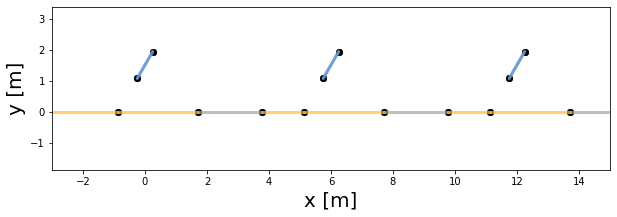

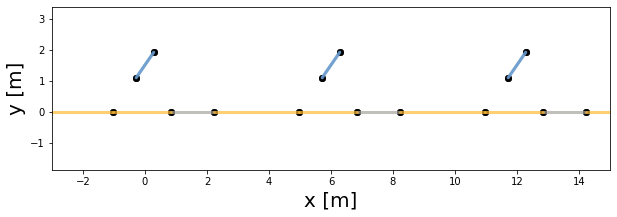

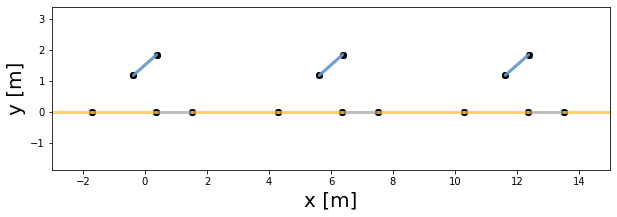

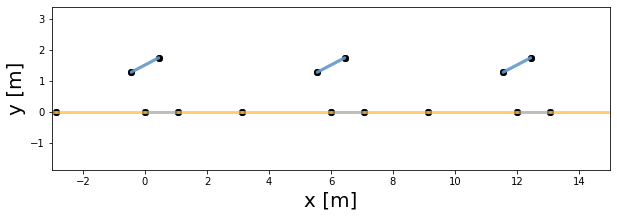

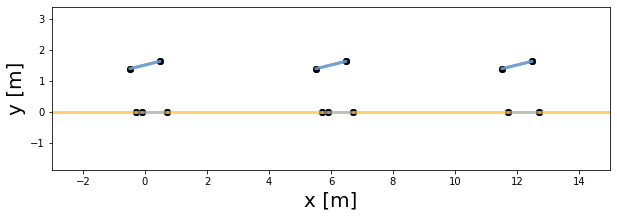

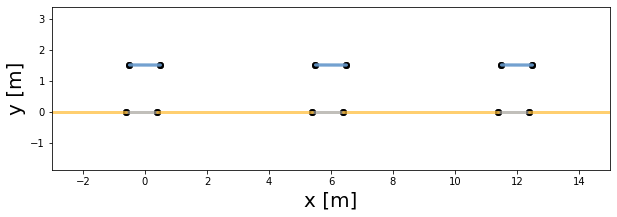

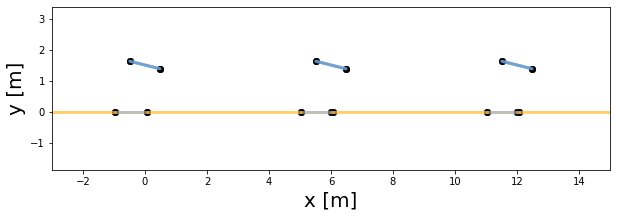

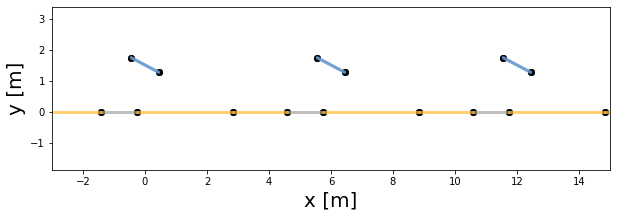

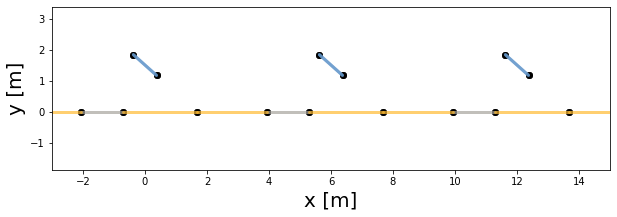

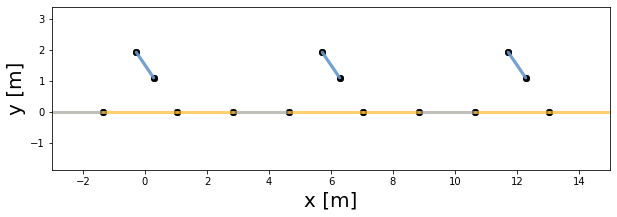

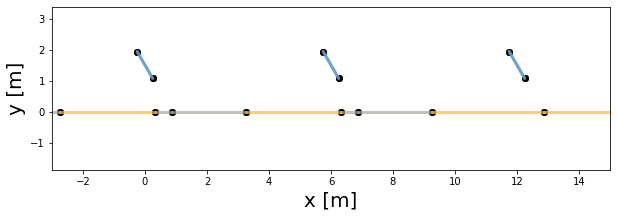

In [98]:
# Loop over i from 10 to 15
for i in range(7, 18):
    # Create a new figure and axis for each plot
    f, ax = plt.subplots(figsize=(10, 3))
     # Set the title indicating the value of i
    #ax.set_title(f"Plot for i = {i} resulting in a shadow rate of "+str(round(sr.loc[i,"shadow_ratio"],2)*100)+"%")
    # Plot pvarray shapely geometries for the current i
    array.plot_at_idx(i, ax)

In [100]:
# Input for LCOE calculation
kWp = 50
capex = 900        # USD per kWp    
opex = 25          # USD per kWp/y
wacc = 0.055
degre = 0.005
inflation = 0.03
N = 25

# LCOE calculation (can be externalized as functions in av_utils)
cashflow= pd.DataFrame(index=range(0,N))
cashflow["OPEX_des"] = (opex * kWp * (1+inflation)**cashflow.index) / (1+wacc)**cashflow.index
cashflow["EG_des"] = (pv.sum()/1000 * kWp * (1-degre)**cashflow.index) / (1+wacc)**cashflow.index
LCOE =  ((capex * kWp + cashflow["OPEX_des"].sum() ) / cashflow["EG_des"].sum())*1000
print("LCOE of the simulated system is "+str(round(LCOE,2))+" USD/kWh")

LCOE of the simulated system is 46.82 USD/kWh


In [101]:
pv.sum()

2174151.7789666783

Next steps:
- create website where inputs can be changed and results displayed (https://streamlit.io/, https://www.youtube.com/watch?v=VqgUkExPvLY) 
- Add other APV dimensions: Water costs and water protection...
